## Course Project

### Credit Card Fraud Detection
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration
Load `creditcard_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

<b>1-1. Explore Data </b>

In [1]:
import pandas as pd
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('creditcard_train.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284652,172786.0,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284653,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284654,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284655,172788.0,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,10.00,0


As mentioned in the previous content, the dataset is highly unbalanced.

In [2]:
df.isnull().sum().sum()

798

There are 798 null values

<b>1-2. Remove outliers </b>

In [43]:
T_df = df.fillna(df.mean())
for col in T_df:
    
    # Since "Class" column is composed of 0 and 1 only, I excluded "Class" column from the for loop
    if col == "Class":
        break
    Q1,Q3 = np.percentile(T_df[col], [25,75])
    IQR = Q3 - Q1
    # Multiply 3.5 to remove extreme values
    T_df = T_df[(T_df[col] >= Q1-3.5*IQR) & (T_df[col] <= Q3+3.5*IQR)]
    
T_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284651,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284653,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284654,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284655,172788.0,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,10.00,0


798 missing values were filled with mean values.
Moreover, by removing outliers, 237160 observations remain for further analysis.

I created box plots to compare the dataset with outliers and without outliers.

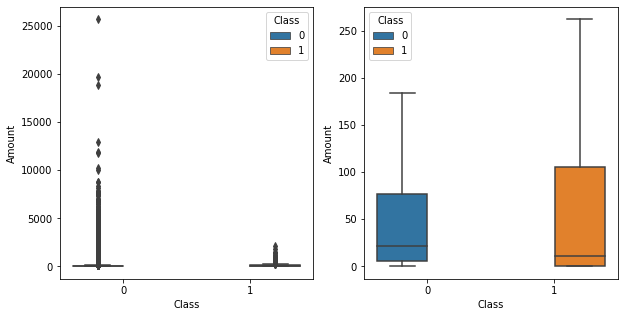

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, showfliers=False)

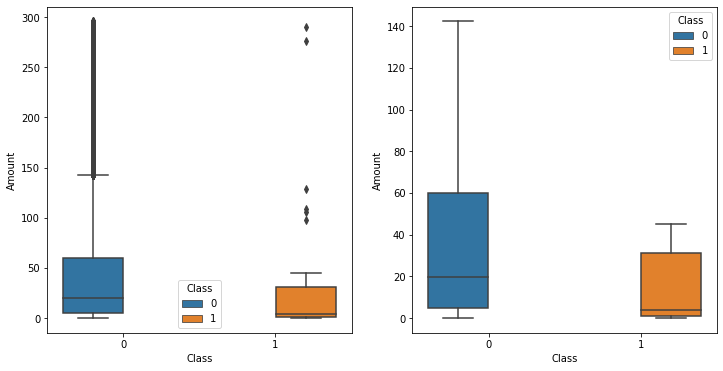

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=T_df,showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=T_df,showfliers=False)

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

<b>(1) Density plot and Histogram of Amount</b>

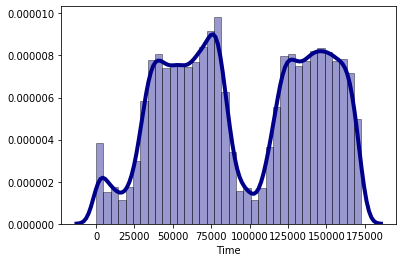

In [6]:
sns.distplot(T_df['Time'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<b>(2) KDE plot over the time</b>

Text(0.5, 0, 'Time')

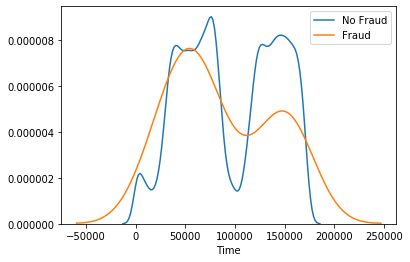

In [7]:
sns.kdeplot(data=T_df.loc[T_df['Class']==0]['Time'],label='No Fraud')
sns.kdeplot(data=T_df.loc[T_df['Class']==1]['Time'],label='Fraud')
plt.xlabel('Time')

<b>(3) Violin Plot </b>

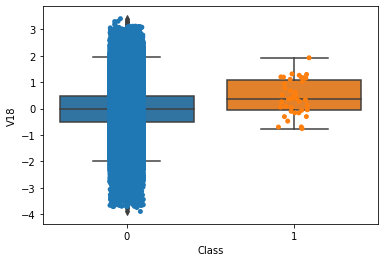

In [8]:
ax = sns.boxplot(x="Class", y="V18", data=T_df)
ax = sns.stripplot(x="Class", y="V18", data=T_df, jitter=True)

I extended a violin plot generated in Module 1 by using striplot. Additional layer of individual values is added on the plot.
The graph shows that the average amount of Class 1 (Fraud) is higher than that of Class 0 (No Fraud) for V18.

<b>(4) Density Plot for V8 and V14</b>

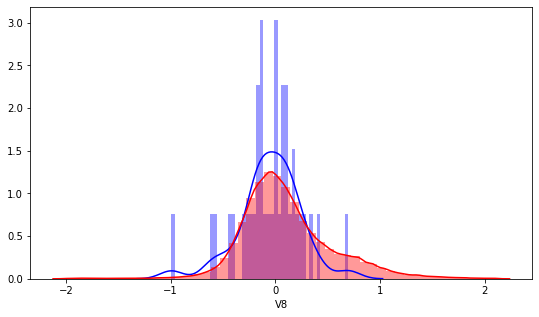

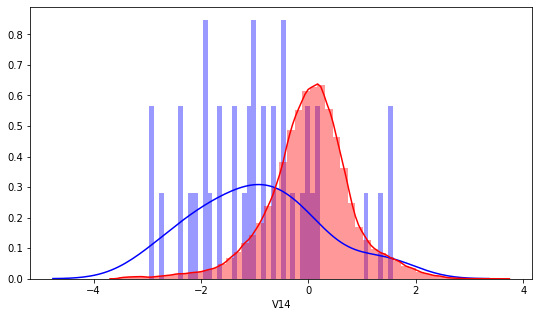

In [9]:
fraud = T_df["Class"] == 1
no_fraud = T_df["Class"] == 0

plt.figure(figsize=(9,5))
sns.distplot(T_df["V8"][fraud], bins = 50, color='b')
sns.distplot(T_df["V8"][no_fraud], bins = 50, color='r')
ax.set_ylabel('Density')
ax.set_title(str("V8"))
ax.set_xlabel('')
plt.show()


plt.figure(figsize=(9,5))
sns.distplot(T_df["V14"][fraud], bins = 50, color='b')
sns.distplot(T_df["V14"][no_fraud], bins = 50, color='r')
ax.set_ylabel('Density')
ax.set_xlabel('')
plt.show()


<b>(5) Pairplot of V1, V8, V12 </b>

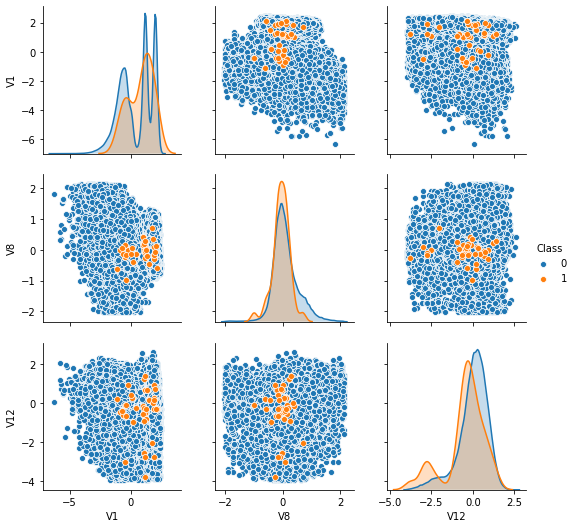

In [10]:
sns.pairplot(T_df, hue='Class',vars=['V1', 'V8','V12']);

In the pairplot of V8 and V12, Class 1 points are crowded in the middle of the graph. It represents that points in Class 1 have similar V8/V12 value.

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

In [11]:
X_df = T_df.drop('Class', axis=1)
X_df.shape

(237160, 30)

In [12]:
Y_df = T_df['Class']
Y_df.shape

(237160,)

I adopted two unsupervised learning method to do dimesion reduction: PCA and t-SNE
<br>
<b>3-1. PCA Dimension Reduction</b>

In [48]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_df) # 3. Fit to data. Notice y is not specified!
df_2D = model.transform(X_df) # 4. Transform the data to two dimensions

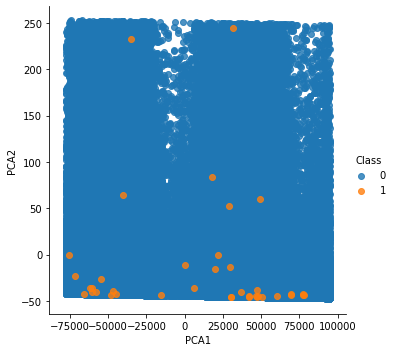

In [14]:
T1_df = T_df.copy()
T1_df['PCA1'] = df_2D[:, 0]
T1_df['PCA2'] = df_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='Class', data=T1_df, fit_reg=False);

In [44]:
from sklearn.mixture import GaussianMixture # 1. Choose the model class
model = GaussianMixture(n_components=3,
covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_df) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_df) # 4. Determine cluster labels

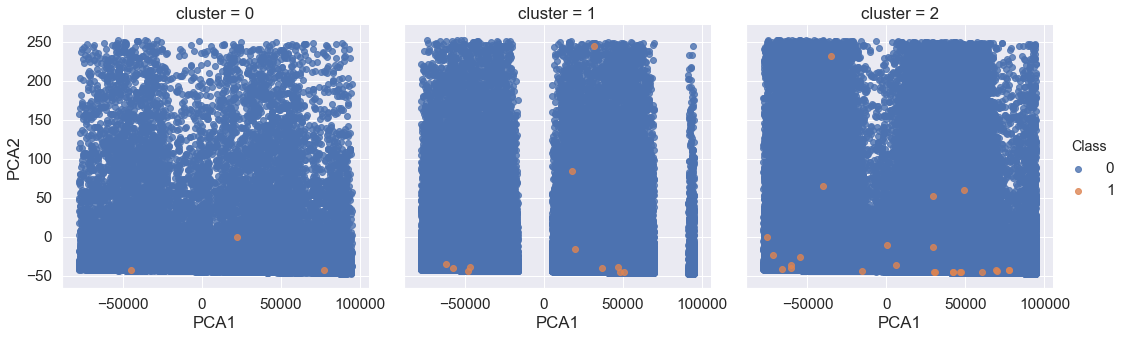

In [45]:
T1_df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=T1_df, hue='Class',
col='cluster', fit_reg=False);

Above graphs shows PCA. According to the graphs, Fraud cases (Class 1) have lower value of PCA2 than normal cases (Class 2).

<b>3-2. t-NSE</b> <br>
Since t-NSE take N^2 times to run the cell, the kernel will run out of time. To proceed t-NSE dimension reduction, we should undersample dataset.

<b>Undersampling</b>

In [17]:
target = "Class"

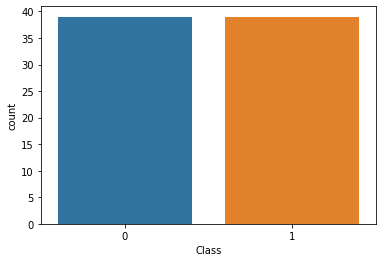

In [18]:
minority_class_len = len(T_df[T_df[target]==1])
majority_class_index = T_df[T_df[target]==0].index
random_majoirty_class = np.random.choice(majority_class_index, minority_class_len, replace = False)
minority_class_index = T_df[T_df[target]==1].index
undersample_index = np.concatenate([minority_class_index,random_majoirty_class])
undersample = T_df.loc[undersample_index]
sns.countplot(x=target, data = undersample)

Now we have undersampled and balanced (in terms of Class) data

In [56]:
X = undersample.loc[:, undersample.columns != 'Class']
y = undersample.loc[:, undersample.columns == 'Class']

X = X.as_matrix()
y = y.as_matrix()
y = y.T[0]

from sklearn.manifold import TSNE

C:\Users\yelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\yelee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [57]:
fraud=undersample[undersample['Class']==1]
non_fraud=undersample[undersample['Class']==0]
                                          
tsne_data=pd.concat([fraud,non_fraud],axis=0)
tsne_data_1=tsne_data.drop(['Class'],axis=1)
tsne=TSNE(n_components=2,random_state=5,verbose=1)
tsne_trans=tsne.fit_transform(tsne_data_1)

[t-SNE] Computing 77 nearest neighbors...
[t-SNE] Indexed 78 samples in 0.000s...
[t-SNE] Computed neighbors for 78 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 78 / 78
[t-SNE] Mean sigma: 792.561709
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.636356
[t-SNE] KL divergence after 1000 iterations: 0.108460


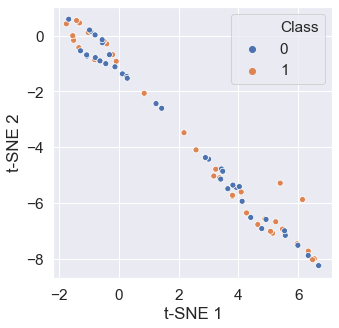

In [58]:
tsne_data['t-SNE 1']=tsne_trans[:,0]
tsne_data['t-SNE 2']=tsne_trans[:,1]
plt.figure(figsize=(5,5))
sns.scatterplot(tsne_data['t-SNE 1'],tsne_data['t-SNE 2'],hue='Class',data=tsne_data)

The cluster of Class 0 and Class 1 is very closely contacted.

### Module 4: Classification
Choose three classification methods and build classification models, using 5-fold cross-validation. <br>

Further, load `creditcard_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix. <br>

Hint: because the dataset is highly unbalanced, consider undersampling, i.e. randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples for model fitting and training. 

In [22]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<b> 4-1. Load test datset </b> <br>
After importing useful librabries, I loaded test datset <i>creditcard_test.csv</i> to evaluate my models and compare the performance. <br> Seperated train data and test data for model fitting

In [36]:
#load test dataset
test_df = pd.read_csv('creditcard_test.csv')
test_df.head()

train_df = undersample.copy()
#train data
X_train = train_df.loc[:, train_df.columns != 'Class']
y_train = train_df.loc[:, train_df.columns == 'Class']
y_train = np.ravel(y_train)

#test data
X_test = test_df.loc[:, test_df.columns != 'Class']
y_test = test_df.loc[:, test_df.columns == 'Class']
y_test = np.ravel(y_test)

<b>4-2. Build Classification Models</b> <br>
(1) Gaussian NB <br>
(2) Decision Tree <br>
(3) Random Forest <br>
(4) Ada Boost

(1) Gaussian NB

confusion matrix: [[81 19]
 [ 9 41]]
Accuracy:  0.8133333333333334


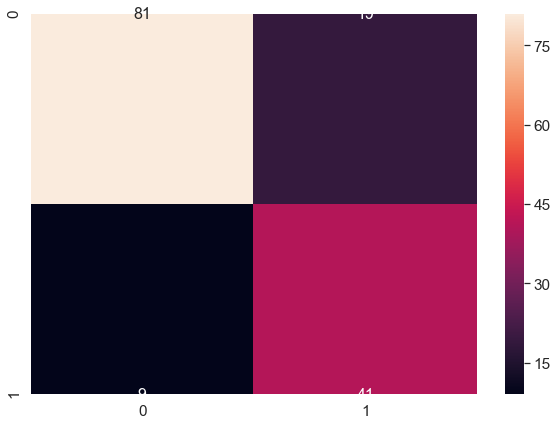

In [27]:
# create model and fit data
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# predict y value of test data
y_model_nb = model_nb.predict(X_test)

# check confusion matrix and accuracy of the model
print('confusion matrix:',confusion_matrix(y_test, y_model_nb))
print('Accuracy: ', accuracy_score(y_test, y_model_nb))

#heatmap
df_cm = confusion_matrix(y_test, y_model_nb)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()

In [28]:
kfold = KFold(n_splits=5)

n = 5

kfold = KFold(n_splits=n)
scores = cross_val_score(model_nb, X_train, y_train, cv=kfold)
print('n_splits={}, cross validation score: {}'.format(n, scores))

x = 0

for i in scores:
    x+=i
print('Mean score is: {}'.format(x/5))

n_splits=5, cross validation score: [0.1875     0.4375     0.875      0.8        0.53333333]
Mean score is: 0.5666666666666667


(2) Decision Tree Classifier

confusion matrix: [[74 26]
 [33 17]]
Accuracy:  0.6066666666666667


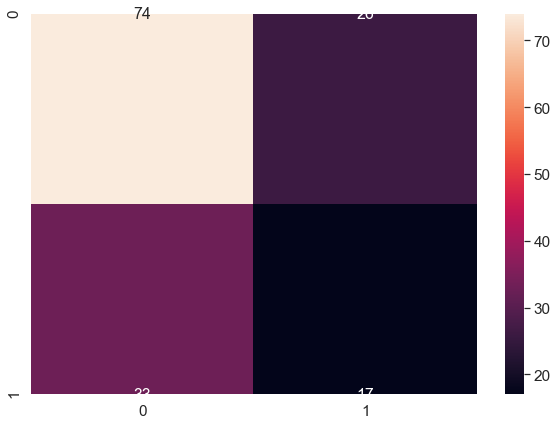

In [40]:
# create model and fit data
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# predict y value of test data
y_pred_dc = model_dt.predict(X_test)

# check confusion matrix and accuracy of the model
print('confusion matrix:',confusion_matrix(y_test, y_pred_dc))
print('Accuracy: ', accuracy_score(y_test, y_pred_dc))

#heatmap
df_cm = confusion_matrix(y_test, y_pred_dc)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()

In [31]:
kfold = KFold(n_splits=5)

n = 5

kfold = KFold(n_splits=n)
scores = cross_val_score(model_dt, X_train, y_train, cv=kfold)
print('n_splits={}, cross validation score: {}'.format(n, scores))

x = 0

for i in scores:
    x+=i
print('Mean score is: {}'.format(x/5))

n_splits=5, cross validation score: [0.5        0.5        0.875      0.33333333 0.66666667]
Mean score is: 0.575


(3) Random Forest Classifier

confusion matrix: [[74 26]
 [36 14]]
Accuracy:  0.5866666666666667


C:\Users\yelee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


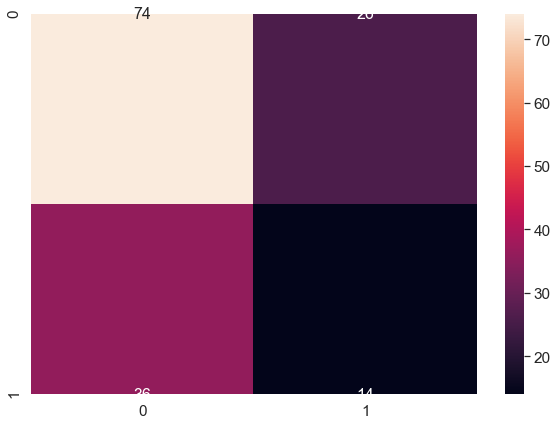

In [32]:
# create model and fit data
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# predict y value of test data
y_pred_rf = model_rf.predict(X_test)

# check confusion matrix and accuracy of the model
print('confusion matrix:',confusion_matrix(y_test, y_pred_rf))
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))

#heatmap
df_cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()


In [33]:
kfold = KFold(n_splits=5)

n = 5

kfold = KFold(n_splits=n)
scores = cross_val_score(model_dt, X_train, y_train, cv=kfold)
print('n_splits={}, cross validation score: {}'.format(n, scores))

x = 0

for i in scores:
    x+=i
print('Mean score is: {}'.format(x/5))

n_splits=5, cross validation score: [0.5        0.4375     0.875      0.53333333 0.6       ]
Mean score is: 0.5891666666666666


(4) Ada Boost Classifier

confusion matrix: [[74 26]
 [36 14]]
Accuracy:  0.5866666666666667


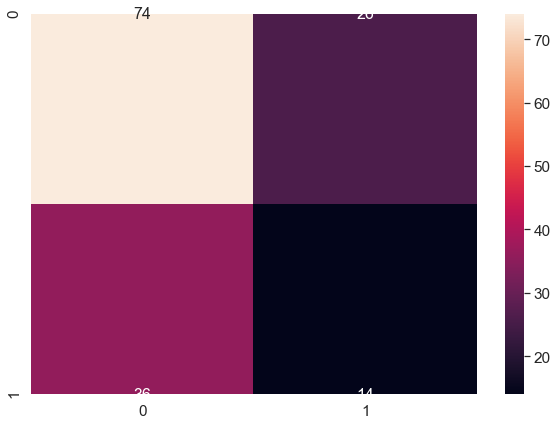

In [34]:
# create model and fit data
model_ab = AdaBoostClassifier()
model_ab.fit(X_train, y_train)

# predict y value of test data
y_pred_ab = model_rf.predict(X_test)

# check confusion matrix and accuracy of the model
print('confusion matrix:',confusion_matrix(y_test, y_pred_ab))
print('Accuracy: ', accuracy_score(y_test, y_pred_ab))

#heatmap
df_cm = confusion_matrix(y_test, y_pred_ab)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()

In [35]:
kfold = KFold(n_splits=5)

n = 5

kfold = KFold(n_splits=n)
scores = cross_val_score(model_ab, X_train, y_train, cv=kfold)
print('n_splits={}, cross validation score: {}'.format(n, scores))

x = 0

for i in scores:
    x+=i
print('Mean score is: {}'.format(x/5))

n_splits=5, cross valizdation score: [0.1875     0.4375     0.75       0.53333333 0.6       ]
Mean score is: 0.5016666666666667


### Module 5: Summary
Summarize your findings and draw conclusions.

By using unsupervised learning and various classifiers to train and test the model, I could find out that Gaussian NB created the best model among four classifiers. Mean Cross Validation score and accuracy score of Gaussian NB are 0.567 and 0.813 respectively. Even if the score is not perfectly high, it's still accurate if we consider that this dataset is real-life data.
